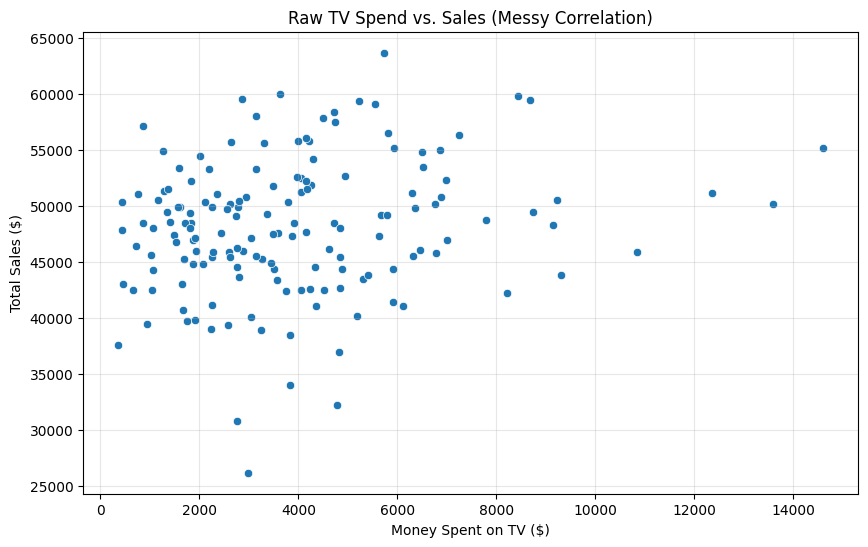

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data we generated in Level 1
df = pd.read_csv('../data/raw/mmm_synthetic_data.csv')
df['Date'] = pd.to_datetime(df['Date']) # Convert text to Date format

# 2. The "sanity check" plot
# Let's try to see if TV Spend correlates with Sales directly.
# (Spoiler: It will look messy because of the lag)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV_Spend', y='Sales', data=df)
plt.title("Raw TV Spend vs. Sales (Messy Correlation)")
plt.xlabel("Money Spent on TV ($)")
plt.ylabel("Total Sales ($)")
plt.grid(True, alpha=0.3)
plt.show()

In [2]:
def adstock(series, rate):
    """
    Recursive Adstock function (The 'Memory' effect)
    """
    res = []
    prev = 0
    for val in series:
        # New Value = Today's Spend + (Yesterday's Value * Decay Rate)
        curr = val + (prev * rate)
        res.append(curr)
        prev = curr
    return np.array(res)

# Example: 
# If rate is 0.5, memory fades fast.
# If rate is 0.9, memory lasts forever.

In [ ]:
# 3. Create Adstocked Versions of each channel
# In a real project, you'd use a loop to find the best rate. 
# Here, we will create a 'best guess' based on industry standards.

# TV usually has long memory (0.85)
df['TV_Adstock'] = adstock(df['TV_Spend'], 0.85)

# Social usually has short memory (0.30)
df['Social_Adstock'] = adstock(df['Social_Spend'], 0.30)

# Radio usually has medium memory (0.50)
df['Radio_Adstock'] = adstock(df['Radio_Spend'], 0.50)

print("Features Engineered. New Columns added:")
print(df[['TV_Spend', 'TV_Adstock']].head())

Features Engineered. New Columns added:
   TV_Spend    TV_Adstock
0   4787.36   4787.360000
1   2988.93   7058.186000
2   2764.57   8764.028100
3   2764.60  10214.023885
4   9299.43  17981.350302


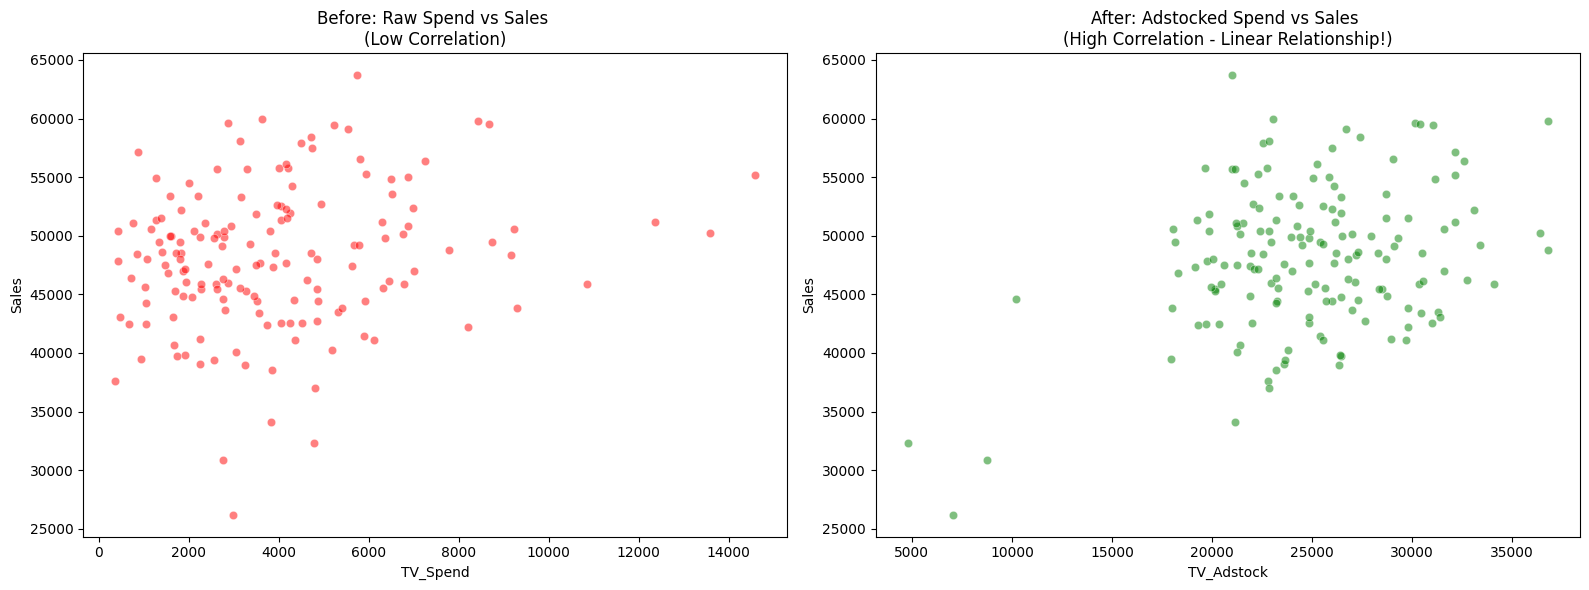

Correlation (Raw TV): 0.19
Correlation (Adstocked TV): 0.33


In [4]:
# 4. The "Aha!" Moment Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Raw Spend (The messy one)
sns.scatterplot(x='TV_Spend', y='Sales', data=df, ax=axes[0], color='red', alpha=0.5)
axes[0].set_title("Before: Raw Spend vs Sales \n(Low Correlation)")

# Plot 2: Adstocked Spend (The clean one)
sns.scatterplot(x='TV_Adstock', y='Sales', data=df, ax=axes[1], color='green', alpha=0.5)
axes[1].set_title("After: Adstocked Spend vs Sales \n(High Correlation - Linear Relationship!)")

plt.tight_layout()
plt.show()

# 5. Check the Correlation Score
corr_raw = df['TV_Spend'].corr(df['Sales'])
corr_adstock = df['TV_Adstock'].corr(df['Sales'])

print(f"Correlation (Raw TV): {corr_raw:.2f}")
print(f"Correlation (Adstocked TV): {corr_adstock:.2f}")

In [ ]:
# Save the data with the new columns
# We will use this file for the Machine Learning model
import os
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/mmm_feature_engineered.csv', index=False)
print("Processed data saved to data/processed/mmm_feature_engineered.csv")

✅ Processed data saved to data/processed/mmm_feature_engineered.csv
